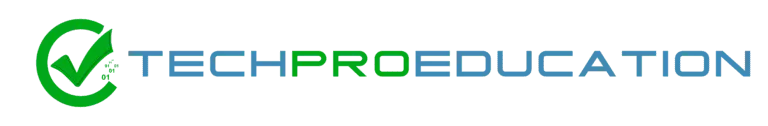

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
pwd

'C:\\Users\\LENOVO\\Data Science\\DL\\CNN'

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

In [3]:
my_data_dir='datam/'

In [4]:
os.listdir(my_data_dir)

['test', 'train']

In [5]:
train_path = my_data_dir+'train'
test_path = my_data_dir+'test'

In [6]:
os.listdir(train_path)

['cat', 'dog']

**Let's check how many images there are.**

In [7]:
len(os.listdir(train_path+'/cat'))

12500

In [8]:
len(os.listdir(train_path+'/dog'))

5026

In [9]:
os.listdir(train_path+'/cat')[0]

'cat.0.jpg'

In [10]:
path1=train_path+'/cat'+'/cat.1000.jpg'
path2=train_path+'/dog'+'/dog.1000.jpg'

In [11]:
cat_img=imread(path1)
dog_img=imread(path2)

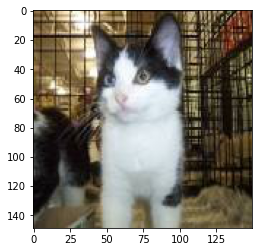

In [12]:
plt.imshow(cat_img)

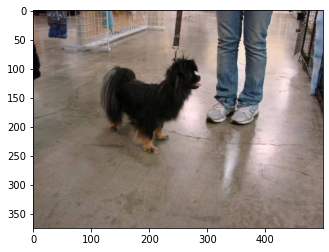

In [13]:
plt.imshow(dog_img)

**Let's decide on the final dimension of these images.**

In [14]:
cat_img.max()

255

In [15]:
cat_img.min()

0

In [16]:
cat_img.shape

(149, 150, 3)

In [17]:
dog_img.shape

(375, 499, 3)

In [18]:
x= []
y = []
for image in os.listdir(train_path+'/cat'):
    
    img = imread(train_path+'/cat/'+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)

<Axes: >

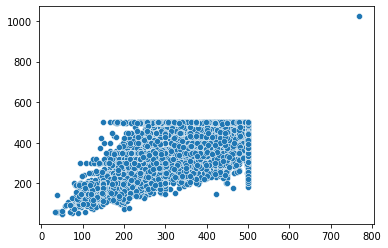

In [19]:
sns.scatterplot(x=x,y=y)

In [20]:
np.mean(x)

356.46712

In [21]:
np.mean(y)

410.52264

In [22]:
image_shape = (256,256,3)

In [23]:
# help(ImageDataGenerator)

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

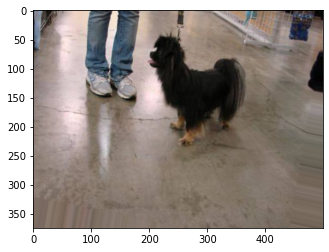

In [26]:
plt.imshow(image_gen.random_transform(dog_img))

image_gen.flow_from_directory(train_path)

# Creating the Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization

In [28]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(128, activation='relu'))


model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 123, 123, 128)     147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 121, 121, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 60, 128)      0         
 2D)                                                    

## Early Stopping

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [34]:
batch_size = 32

In [35]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(256,256),
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True)

Found 17526 images belonging to 2 classes.


## Model Training

In [36]:
results = model.fit(train_image_gen,epochs=20,
                    validation_data=test_path,
                    callbacks=[early_stop])

Epoch 1/20
  1/548 [..............................] - ETA: 3:02:52 - loss: 0.6921 - accuracy: 0.6250

KeyboardInterrupt: 

# Evaluating the Model

In [42]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.605052,0.712930,0.720395,0.530370
1,0.593084,0.713102,0.749688,0.533451
2,0.586356,0.712816,0.711991,0.535651
3,0.563504,0.714702,0.694507,0.536092
4,0.508828,0.756545,0.558258,0.719190


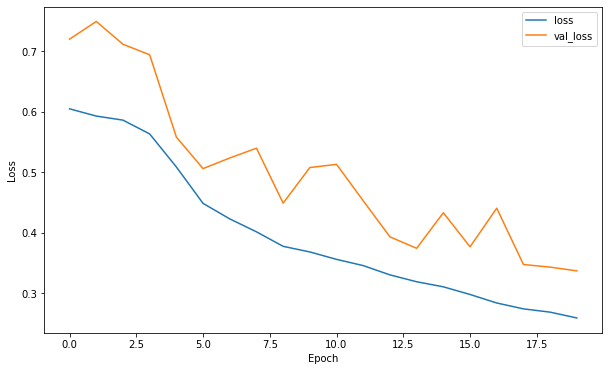

In [43]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

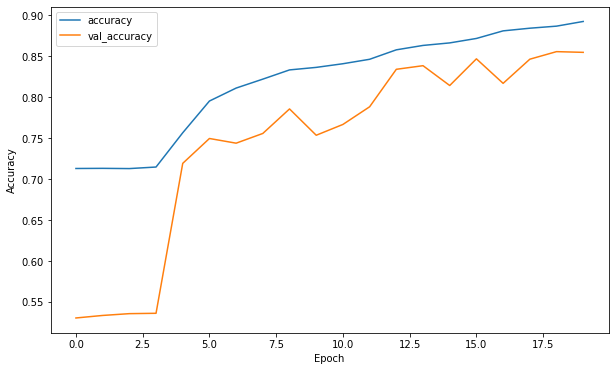

In [44]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [45]:
model.metrics_names

['loss', 'accuracy']

In [46]:
model.evaluate(val_image_gen)

71/71 [==============================] - 33s 464ms/step - loss: 0.3347 - accuracy: 0.8530


[0.33466219902038574, 0.8529929518699646]

In [75]:
pred_probabilities = model.predict(test_image_gen)

In [76]:
pred_probabilities

array([[0.10673191],
       [0.51131946],
       [0.18750179],
       ...,
       [0.99868566],
       [0.9653855 ],
       [0.9958806 ]], dtype=float32)

In [91]:
test_image_gen.classes[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [92]:
predictions = pred_probabilities > 0.5

In [93]:
predictions[:50]

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [94]:
from sklearn.metrics import classification_report,confusion_matrix

In [95]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1219
           1       0.84      0.84      0.84      1071

    accuracy                           0.85      2290
   macro avg       0.85      0.85      0.85      2290
weighted avg       0.85      0.85      0.85      2290



In [96]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1051,  168],
       [ 176,  895]])

In [97]:
from tensorflow.keras.models import load_model
model.save('cat_dog_detector.h5')

# Predicting on an Image

In [ ]:
train_image_gen.class_indices

In [ ]:
test_image_gen.class_indices

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('cat_dog_detector.h5')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("C:\\Users\\LENOVO\\Desktop\\teest.jpg")
image = image.resize((256, 256))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Tahmin yapın
prediction = model.predict(image_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('cat_dog_detector.h5')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("C:\\Users\\LENOVO\\Desktop\\doog.jpeg")
image = image.resize((256, 256))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Tahmin yapın
prediction = model.predict(image_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)

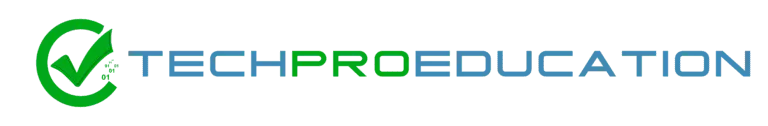